In [45]:
importDirectory = '/Users/sean/mbp_storage/251018/portMain'
importPath = os.path.join(importDirectory,'Port Main'+'.h5')

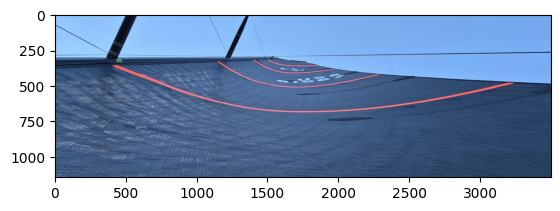

In [46]:
normalisations = []
features = veeringCV.VeeringNormalisation(importPath)
features.RunNormalisation(normalisations)
images = np.reshape(features.pixcels, features.origShape, order='F')
testPic = images[:, :, :, 0]
plt.imshow(testPic.astype('uint8'))

In [47]:
from sklearn.decomposition import PCA
testPix = features.pixcels[:,:,0]


In [48]:
print(np.mean(testPix[:,0]))
print(np.mean(testPix[:,1]))
print(np.mean(testPix[:,2]))
print(np.std(testPix[:,0]))
print(np.std(testPix[:,1]))
print(np.std(testPix[:,2]))

86.29331
118.05945
163.79324
39.418808
47.5161
58.89654


In [28]:
for i in [0,1,2]:
    testPix[:,i] = (testPix[:,i] - np.mean(testPix[:,i]))/np.std(testPix[:,i])


In [49]:
pca = PCA(n_components=3)
pca.fit(testPix)

,n_components,3
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [50]:
pca_pix = pca.transform(testPix)

In [51]:
for i in range(3):
    pca_pix[:,i] = (pca_pix[:,i]*(256/(np.max(pca_pix[:,i]) - np.min(pca_pix[:,i]))))+128


In [52]:
pic = np.reshape(pca_pix, (features.origShape[0], features.origShape[1],3), order='F')

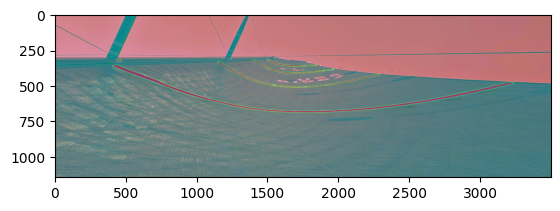

In [53]:
plt.imshow(pic.astype('uint8'))